## Exercise  2.1 Unsupervised Learning Algorithms


### 1. Importing Libraries and Data

### 2. Dendrograms

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
path = '/Users/mariazaremba/Documents/CareerFoundry/Machine Learning with Python'

In [3]:
data = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'dfPCA_1986.csv'), index_col = False)

In [4]:
data

,Unnamed: 0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0,-12.358824,-3.293958,1.794519,1.143227,-2.349805,-0.479107,-4.363070,-0.182603,-0.063078,-0.866361,-1.249168
1,1,-10.766153,-7.220141,1.152491,2.373160,-3.765463,-0.423791,-5.115310,0.301486,1.051312,0.481286,-1.472212
2,2,-8.830328,-5.117831,0.631688,1.188460,-1.025571,-0.643805,-3.496660,-2.729633,1.950374,-1.743081,0.439153
3,3,-10.340551,-0.715105,1.592876,-1.985055,-1.672474,-2.493623,-1.900700,-0.855479,2.076258,-1.434819,0.444276
4,4,-11.335672,-3.370796,-0.747434,4.370120,-0.376808,-1.626275,-1.962288,-0.122214,0.578553,-1.316737,1.018424
...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,-9.556846,-0.766766,-0.545078,-1.802833,-0.838306,-1.267363,3.206073,-0.030402,1.073952,-1.031857,-0.936646
361,361,-8.680355,-1.853674,-3.080981,-1.859720,-0.897634,-1.042999,3.798059,0.746202,-0.452203,-1.226284,-0.533594
362,362,-6.698710,-4.511310,-3.524374,-1.723110,-2.620253,-1.091409,2.715903,-0.911081,-2.639085,-0.779861,1.520024
363,363,-6.090560,-6.951449,-4.253085,1.888240,-0.372585,-1.506819,3.180460,-1.374414,-3.535962,0.915322,1.570286


In [5]:
data = data.drop(columns=['Unnamed: 0'], errors='ignore')

In [6]:
data

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-12.358824,-3.293958,1.794519,1.143227,-2.349805,-0.479107,-4.363070,-0.182603,-0.063078,-0.866361,-1.249168
1,-10.766153,-7.220141,1.152491,2.373160,-3.765463,-0.423791,-5.115310,0.301486,1.051312,0.481286,-1.472212
2,-8.830328,-5.117831,0.631688,1.188460,-1.025571,-0.643805,-3.496660,-2.729633,1.950374,-1.743081,0.439153
3,-10.340551,-0.715105,1.592876,-1.985055,-1.672474,-2.493623,-1.900700,-0.855479,2.076258,-1.434819,0.444276
4,-11.335672,-3.370796,-0.747434,4.370120,-0.376808,-1.626275,-1.962288,-0.122214,0.578553,-1.316737,1.018424
...,...,...,...,...,...,...,...,...,...,...,...
360,-9.556846,-0.766766,-0.545078,-1.802833,-0.838306,-1.267363,3.206073,-0.030402,1.073952,-1.031857,-0.936646
361,-8.680355,-1.853674,-3.080981,-1.859720,-0.897634,-1.042999,3.798059,0.746202,-0.452203,-1.226284,-0.533594
362,-6.698710,-4.511310,-3.524374,-1.723110,-2.620253,-1.091409,2.715903,-0.911081,-2.639085,-0.779861,1.520024
363,-6.090560,-6.951449,-4.253085,1.888240,-0.372585,-1.506819,3.180460,-1.374414,-3.535962,0.915322,1.570286


In [15]:
#Read in the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

## 2. Dendrograms

- single method

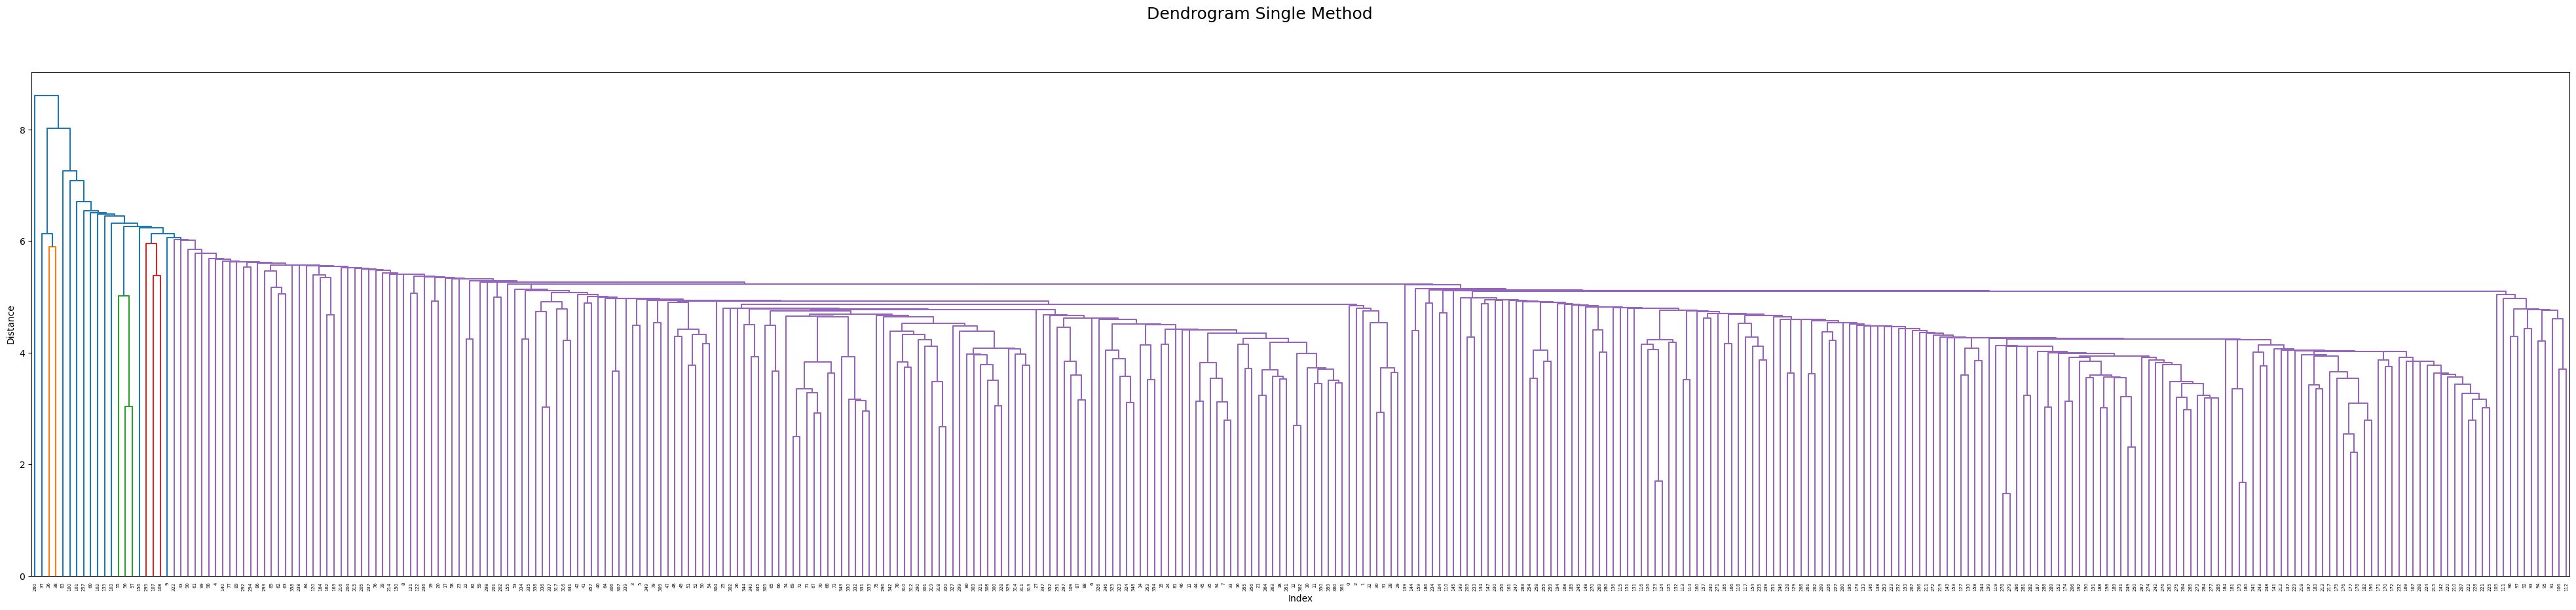

In [7]:
# Create the dendrogram using the single linkage method
linked = linkage(data, method='single')

# Plot the dendrogram
plt.figure(figsize=(50,10))
dendrogram(linked, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

- complete method

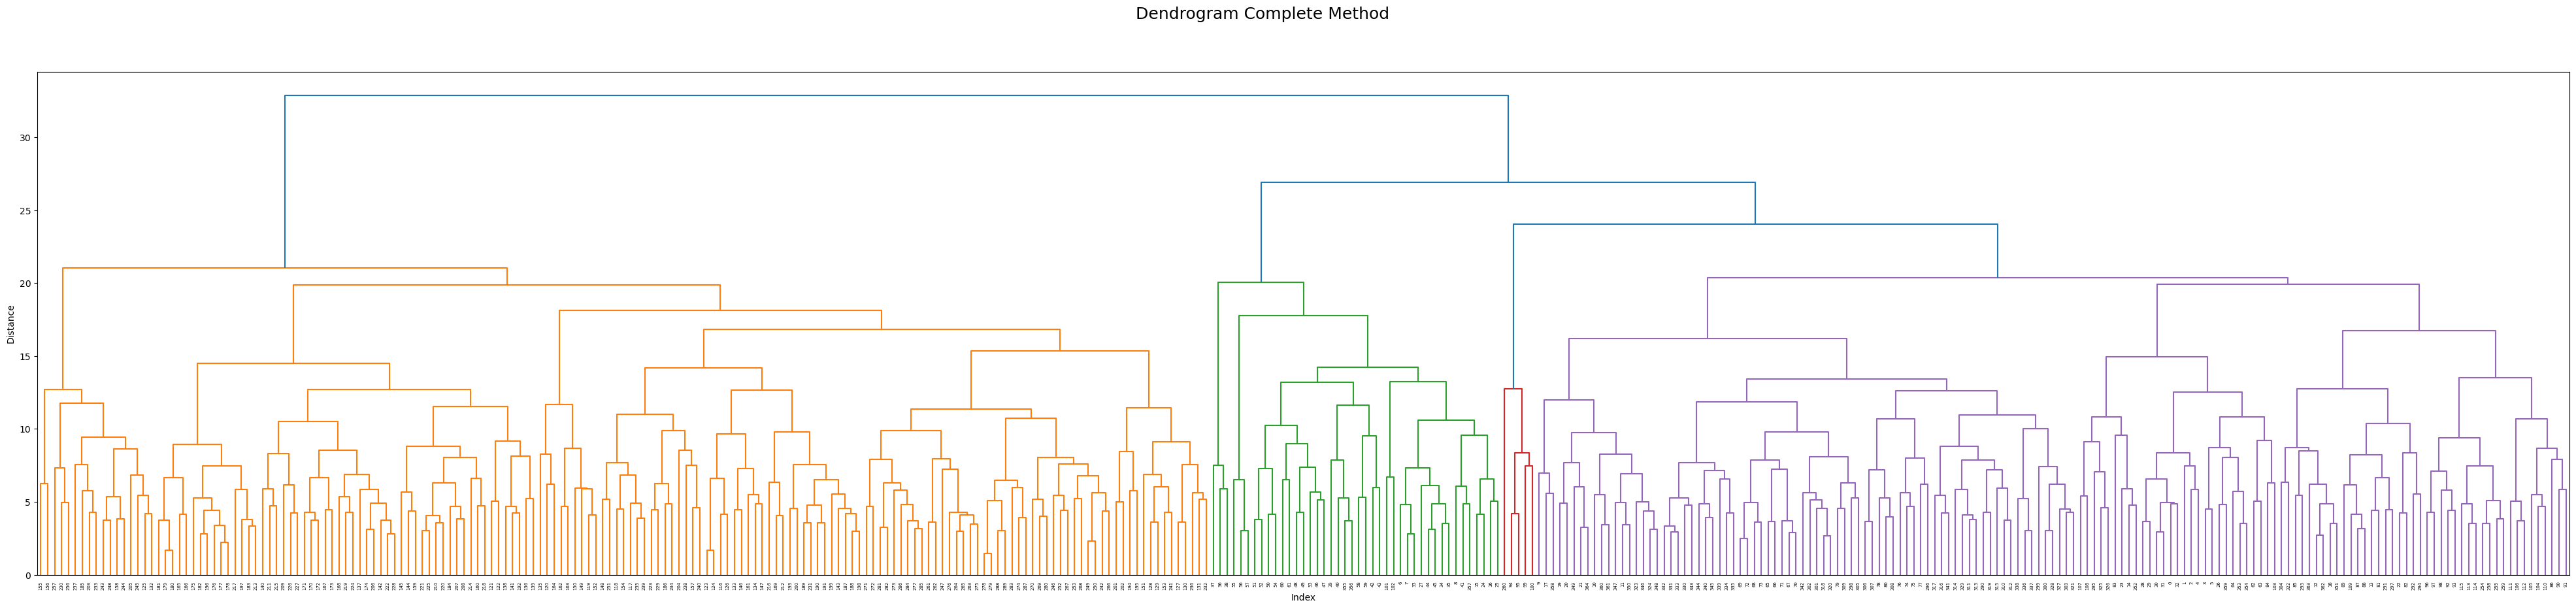

In [12]:
# Create the dendrogram using the complete linkage method
linked = linkage(data, method='complete')

# Plot the dendrogram
plt.figure(figsize=(50,10))
dendrogram(linked, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

- average method

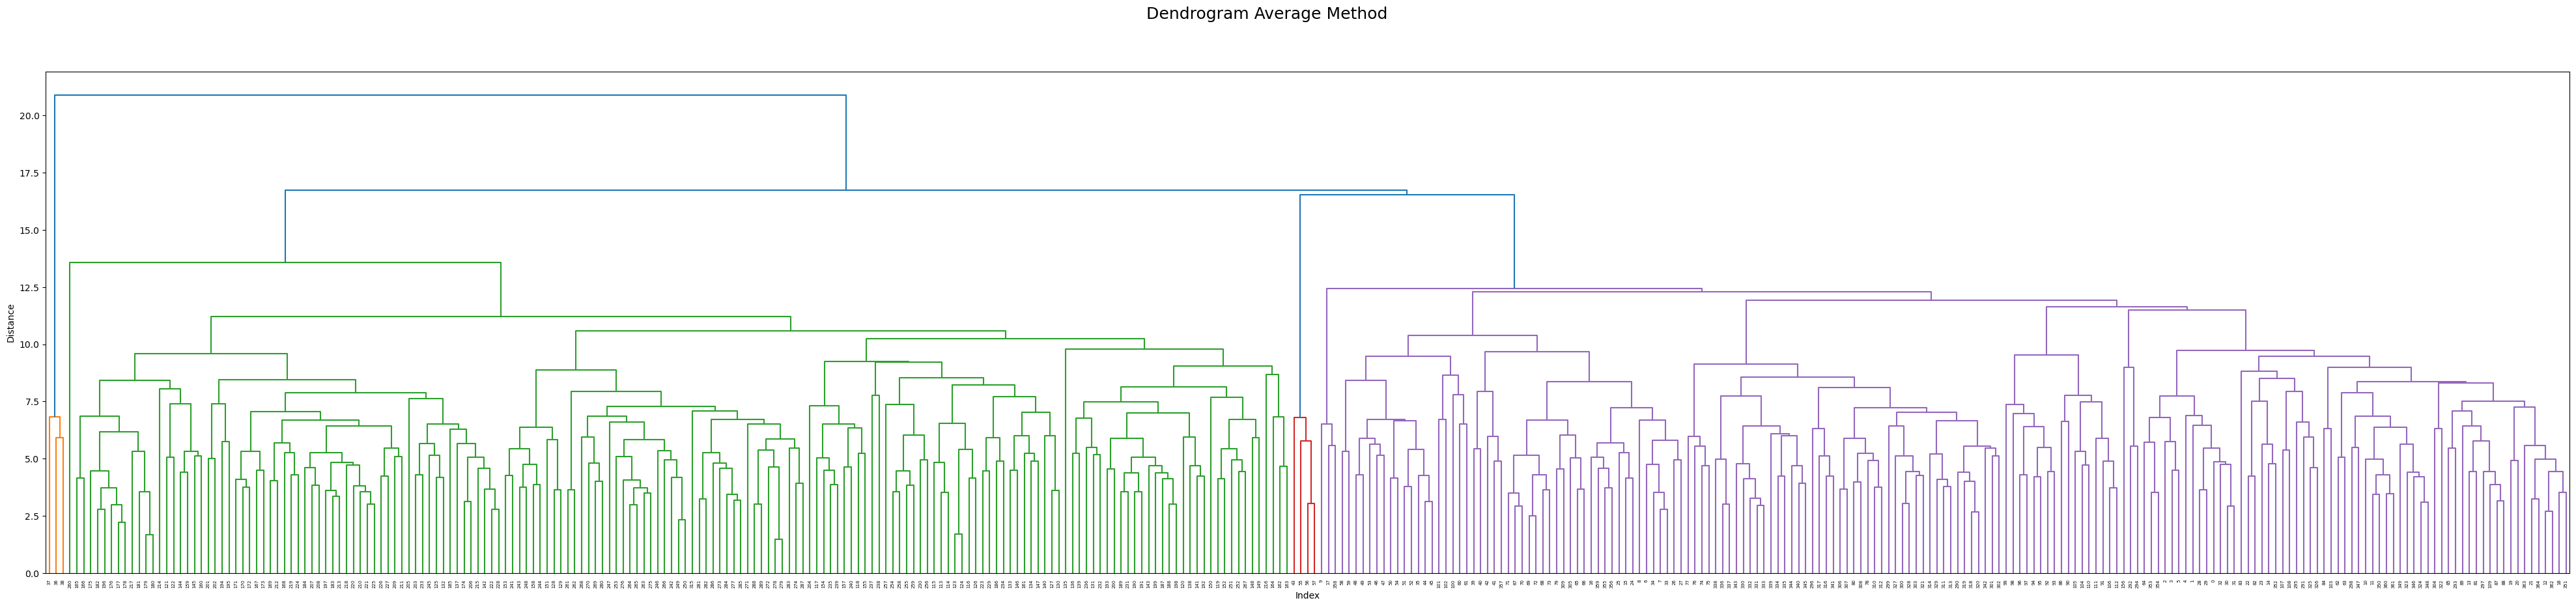

In [11]:
# Create the dendrogram using the average linkage method
linked = linkage(data, method='average')

# Plot the dendrogram
plt.figure(figsize=(50,10))
dendrogram(linked, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

- ward method

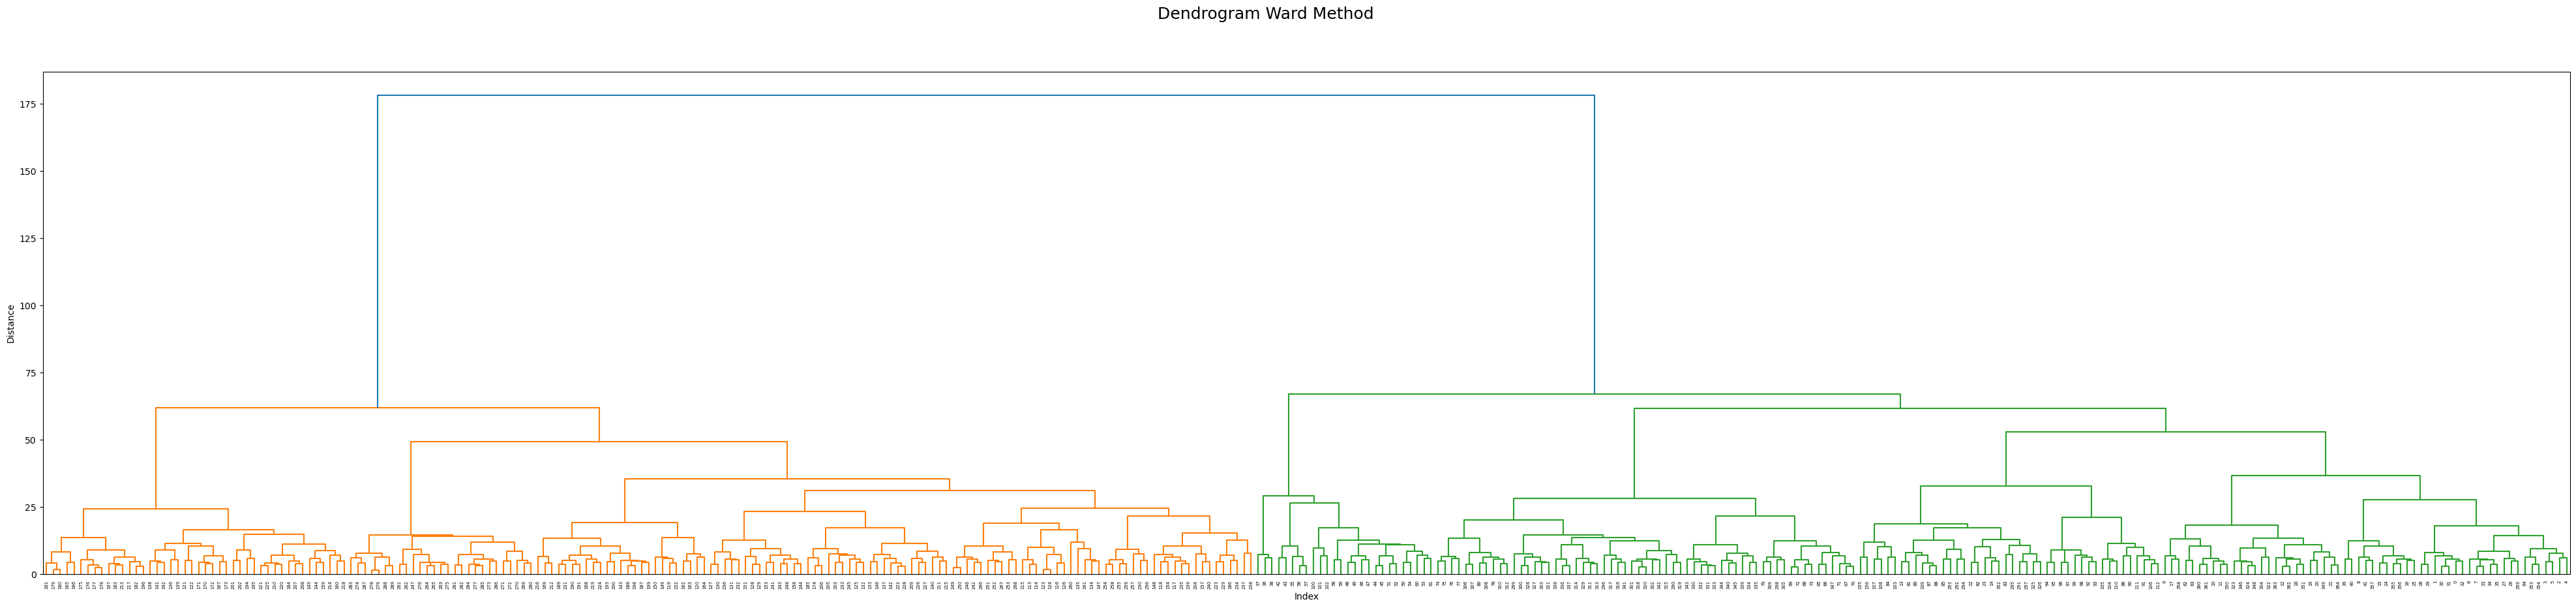

In [13]:
# Create the dendrogram using the ward linkage method
linked = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(50,10))
dendrogram(linked, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()